# Projeto
##  Junior Fernandes Marques

Dados obtidos do Portal Brasileiro de Dados Abertos: https://dados.gov.br/dataset/incendios-em-ucs

Mapeamento das áreas queimadas, em hectares, no interior de Unidades de Conservação Federais medidas por sensoriamento remoto através de identificação das cicatrizes em imagens Modis Rapid Response, Landsat 8, Sentinel 2 e CBERS4 por interpretação visual. A área queimada engloba informações da área atingida por incêndios e das ações de prevenção de incêndios que utilizam fogo, como aceiros e queimas prescritas, além de áreas autorizadas para uso do fogo com fins agrossilvopastoris no interior das Unidades. O período estudado foi de 2012 a 2019.

In [1]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Junior\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Criando o DataFrame
df = pd.read_excel("areas_queimadas_em_unidades_de_conservacao_federal.xlsx")

In [3]:
#Visualizando as 5 primeiras linhas
df.head()

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,...,Área queimada em 2016,ano da queima.3,Área queimada em 2015,ano da queima.4,Área queimada em 2014,ano da queima.5,Área queimada em 2013,ano da queima.6,Área queimada em 2012,ano da queima.7
0,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4436.590227,Marinho-Costeiro,NaN,...,NaN,2016,NaN,2015,NaN,2014,NaN,2013,NaN,2012
1,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292599.924245,Mata Atlântica,NaN,...,NaN,2016,NaN,2015,NaN,2014,NaN,2013,NaN,2012
2,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14917.791283,Marinho-Costeiro,NaN,...,NaN,2016,NaN,2015,NaN,2014,NaN,2013,NaN,2012
3,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39957.148494,Cerrado,NaN,...,NaN,2016,NaN,2015,NaN,2014,NaN,2013,NaN,2012
4,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,CR11 Lagoa Santa/MG,143355.585718,Cerrado,NaN,...,NaN,2016,NaN,2015,NaN,2014,NaN,2013,NaN,2012


In [4]:
#Quantidade de linhas e colunas
df.shape

(325, 25)

In [5]:
#Verificando os tipos de dados
df.dtypes

Código CNUC                                object
Nome da UC                                 object
Categoria da UC: sigla federal             object
Categoria da UC: nomenclatura nacional     object
Grupo de Proteção                          object
Ano de criação                              int64
Coordenação Regional do ICMBio             object
Área estimada da UC - hectare             float64
Bioma referencial                          object
Área queimada em 2019                     float64
ano da  queima                              int64
Área queimada em 2018                     float64
ano da  queima.1                            int64
Área queimada em 2017                     float64
ano da  queima.2                            int64
Área queimada em 2016                     float64
ano da  queima.3                            int64
Área queimada em 2015                     float64
ano da  queima.4                            int64
Área queimada em 2014                     float64


In [6]:
# Eliminando algumas colunas
columns = ['Código CNUC','ano da  queima','ano da  queima.1','ano da  queima.2',
           'ano da  queima.3','ano da  queima.4','ano da  queima.5','ano da  queima.6','ano da  queima.7']
df.drop(columns, inplace=True, axis=1)

In [7]:
df.count()

Nome da UC                                325
Categoria da UC: sigla federal            325
Categoria da UC: nomenclatura nacional    325
Grupo de Proteção                         325
Ano de criação                            325
Coordenação Regional do ICMBio            325
Área estimada da UC - hectare             325
Bioma referencial                         325
Área queimada em 2019                      50
Área queimada em 2018                      39
Área queimada em 2017                      78
Área queimada em 2016                      52
Área queimada em 2015                      50
Área queimada em 2014                      32
Área queimada em 2013                      28
Área queimada em 2012                      39
dtype: int64

In [8]:
df2 = pd.DataFrame(round(df.fillna(0),2))

In [9]:
df2.head()

,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Coordenação Regional do ICMBio,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,CR9 Florianópolis/SC,4436.59,Marinho-Costeiro,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,CR8 Rio de Janeiro/RJ,292599.92,Mata Atlântica,0.0,0.0,182.09,0.0,0.0,0.0,0.0,0.0
2,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,CR6 Cabedelo/PB,14917.79,Marinho-Costeiro,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,CR11 Lagoa Santa/MG,39957.15,Cerrado,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,CR11 Lagoa Santa/MG,143355.59,Cerrado,0.0,0.0,260.65,0.0,0.0,0.0,0.0,0.0


In [10]:
df_biomas = df2.groupby('Bioma referencial')
df_biomas

In [11]:
ordena_Biomas = df_biomas.size()

In [12]:
#Biomas que mais sofreram com queimadas durante o período - Registro
ordena_Biomas.sort_values(ascending=False)

Bioma referencial
Amazônia            125
Mata Atlântica       92
Cerrado              45
Marinho-Costeiro     33
Caatinga             25
Pampas                3
Pantanal              2
dtype: int64

In [40]:
# A média do período de 2019
round(df2.groupby(['Bioma referencial']).agg({'Área estimada da UC - hectare':'sum', 'Área queimada em 2019':'mean'}),2)

,Área estimada da UC - hectare,Área queimada em 2019
Bioma referencial,,
Amazônia,63527971.78,1896.12
Caatinga,4358779.24,127.32
Cerrado,5478024.27,20146.17
Marinho-Costeiro,1589304.61,0.00
Mata Atlântica,3824239.95,560.87
Pampas,364452.59,0.00
Pantanal,147477.63,0.00


In [13]:
# Eliminando mais colunas
columns = ['Categoria da UC: sigla federal','Grupo de Proteção','Ano de criação','Coordenação Regional do ICMBio']
df2.drop(columns, inplace=True, axis=1)

In [14]:
df2.head()

,Nome da UC,Categoria da UC: nomenclatura nacional,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,APA Anhatomirim,Área de Proteção Ambiental,4436.59,Marinho-Costeiro,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,APA Bacia Hidrográfica do Rio Paraíba do Sul,Área de Proteção Ambiental,292599.92,Mata Atlântica,0.0,0.0,182.09,0.0,0.0,0.0,0.0,0.0
2,APA Barra do Rio Mamanguape,Área de Proteção Ambiental,14917.79,Marinho-Costeiro,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,APA Carste da Lagoa Santa,Área de Proteção Ambiental,39957.15,Cerrado,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,APA Cavernas do Peruaçu,Área de Proteção Ambiental,143355.59,Cerrado,0.0,0.0,260.65,0.0,0.0,0.0,0.0,0.0


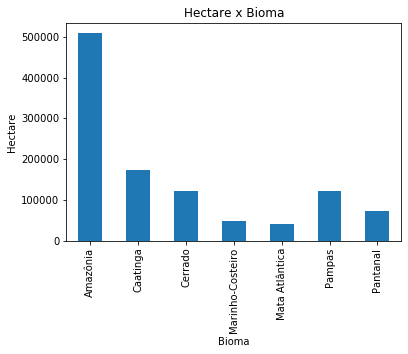

In [15]:
# Representatividade de cada bioma por hectare x Unidade de Conservação
df2.groupby('Bioma referencial')['Área estimada da UC - hectare'].mean().plot.bar(title="Hectare x Bioma")
plt.xlabel("Bioma")
plt.ylabel("Hectare")
plt.xticks(rotation='vertical');

In [16]:
df_protecao = df2.groupby('Categoria da UC: nomenclatura nacional')

In [17]:
ordena_Protecao = df_protecao.size()

In [18]:
#Áreas que mais sofreram com as queimadas durante o período - Registro.
ordena_Protecao.sort_values(ascending=False)

Categoria da UC: nomenclatura nacional
Parque                                    74
Floresta                                  67
Reserva Extrativista                      62
Área de Proteção Ambiental                33
Estação Ecológica                         32
Reserva Biológica                         31
Área de Relevante Interesse Ecológico     13
Refúgio de Vida Silvestre                  8
Monumento Natural                          3
Reserva de Desenvolvimento Sustentável     2
dtype: int64

In [28]:
#Áreas que mais sofreram com as queimadas durante o período - Por hectare.
df2.groupby(['Categoria da UC: nomenclatura nacional','Bioma referencial']).sum().reset_index()

,Categoria da UC: nomenclatura nacional,Bioma referencial,Área estimada da UC - hectare,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
0,Estação Ecológica,Amazônia,6193229.24,8921.00,72615.54,8815.15,1079.21,6574.70,1058.37,4451.25,2809.71
1,Estação Ecológica,Caatinga,130289.43,144.91,1513.11,0.00,0.00,1758.15,0.00,0.00,0.00
2,Estação Ecológica,Cerrado,1086725.36,215025.25,160174.85,216060.03,258399.92,292514.49,321178.20,204892.45,317046.72
3,Estação Ecológica,Marinho-Costeiro,4191.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Estação Ecológica,Mata Atlântica,36188.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Estação Ecológica,Pampas,10938.64,0.00,0.00,0.00,0.00,0.00,0.00,3930.44,0.00
6,Estação Ecológica,Pantanal,11554.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Floresta,Amazônia,17711370.28,121369.23,23238.61,51446.11,35365.18,39146.15,20750.69,3118.66,22335.44
8,Floresta,Caatinga,54188.24,999.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Floresta,Cerrado,29635.37,1523.82,328.80,2634.64,1610.37,760.50,984.61,406.75,0.00


In [19]:
#Parques do Bioma Amazônia que sofreram queimadas durante o período
df_amazonia = df2[(df2['Bioma referencial'] == 'Amazônia') & (df2['Categoria da UC: nomenclatura nacional'] == 'Parque')]
df_amazonia       

,Nome da UC,Categoria da UC: nomenclatura nacional,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
149,PARNA da Amazônia,Parque,1066208.10,Amazônia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
161,PARNA da Serra da Cutia,Parque,283503.50,Amazônia,0.00,0.00,0.00,2474.07,0.00,0.00,0.00,0.00
165,PARNA da Serra do Divisor,Parque,837559.63,Amazônia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
168,PARNA da Serra do Pardo,Parque,445413.45,Amazônia,4765.91,0.00,2304.89,0.00,0.00,0.00,0.00,0.00
176,PARNA de Anavilhanas,Parque,340835.17,Amazônia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
184,PARNA de Pacaás Novos,Parque,708669.90,Amazônia,0.00,4706.30,2694.24,12787.86,9300.70,0.00,4366.76,6127.70
190,PARNA do Acari,Parque,896407.00,Amazônia,445.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
194,PARNA do Cabo Orange,Parque,657327.77,Amazônia,1551.86,0.00,0.00,4466.49,2254.67,0.00,0.00,37480.88
197,PARNA do Jamanxim,Parque,859806.92,Amazônia,503.78,0.00,1452.74,0.00,1378.13,0.00,0.00,380.05
198,PARNA do Jaú,Parque,2367357.47,Amazônia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
# Parques do Bioma Amazônia que sofreram queimadas em mais períodos decorrentes
df_amazonia.loc[(df_amazonia['Área queimada em 2019'] > 0) & 
                    (df_amazonia['Área queimada em 2018'] > 0) ]

,Nome da UC,Categoria da UC: nomenclatura nacional,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
205,PARNA do Rio Novo,Parque,538157.15,Amazônia,1858.75,408.66,919.11,530.02,490.33,628.75,0.00,0.00
208,PARNA dos Campos Amazônicos,Parque,961326.65,Amazônia,38784.29,26933.83,14611.92,20221.67,4954.98,71153.87,442.67,9336.52
214,PARNA Mapinguari,Parque,1776928.60,Amazônia,4179.93,2241.44,8530.05,21447.79,14039.00,0.00,1241.64,22460.47


In [21]:
#Parques do Bioma Mata Atlântica que sofreram queimadas durante o período
df_mtAtlantica = df2[(df2['Bioma referencial'] == 'Mata Atlântica') & (df2['Categoria da UC: nomenclatura nacional'] == 'Parque')]
df_mtAtlantica

,Nome da UC,Categoria da UC: nomenclatura nacional,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
156,PARNA da Restinga de Jurubatiba,Parque,14867.44,Mata Atlântica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
157,PARNA da Serra da Bocaina,Parque,104045.91,Mata Atlântica,0.00,0.00,1011.96,0.00,0.00,0.00,0.00,0.00
163,PARNA da Serra das Lontras,Parque,11343.84,Mata Atlântica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
166,PARNA da Serra do Gandarela,Parque,31284.00,Mata Atlântica,140.76,516.37,44.25,0.00,470.67,0.00,0.00,0.00
167,PARNA da Serra do Itajaí,Parque,57375.14,Mata Atlântica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
169,PARNA da Serra dos Órgãos,Parque,20020.75,Mata Atlântica,0.00,64.56,0.00,0.00,0.00,0.00,0.00,0.00
170,PARNA da Serra Geral,Parque,17302.01,Mata Atlântica,28.13,0.00,21.51,198.23,0.00,0.00,0.00,0.00
171,PARNA da Tijuca,Parque,3958.51,Mata Atlântica,0.00,0.00,4.92,0.00,0.00,0.00,0.00,0.00
172,PARNA das Araucárias,Parque,12809.59,Mata Atlântica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
177,PARNA de Aparados da Serra,Parque,13148.14,Mata Atlântica,1661.40,0.00,855.56,288.96,0.00,0.00,0.00,0.00


In [22]:
# Parques do Bioma Mata Atlântica que sofreram queimadas em mais períodos decorrentes
df_mtAtlantica.loc[(df_mtAtlantica['Área queimada em 2019'] > 0) & 
                    (df_mtAtlantica['Área queimada em 2018'] > 0)]

,Nome da UC,Categoria da UC: nomenclatura nacional,Área estimada da UC - hectare,Bioma referencial,Área queimada em 2019,Área queimada em 2018,Área queimada em 2017,Área queimada em 2016,Área queimada em 2015,Área queimada em 2014,Área queimada em 2013,Área queimada em 2012
166,PARNA da Serra do Gandarela,Parque,31284.0,Mata Atlântica,140.76,516.37,44.25,0.0,470.67,0.0,0.0,0.0


In [23]:
# Descrição do parque do Bioma da Mata Atlântica que mais sofreu com queimadas
df2.iloc[166]

Nome da UC                                PARNA da Serra do Gandarela
Categoria da UC: nomenclatura nacional                         Parque
Área estimada da UC - hectare                                 31284.0
Bioma referencial                                      Mata Atlântica
Área queimada em 2019                                          140.76
Área queimada em 2018                                          516.37
Área queimada em 2017                                           44.25
Área queimada em 2016                                             0.0
Área queimada em 2015                                          470.67
Área queimada em 2014                                             0.0
Área queimada em 2013                                             0.0
Área queimada em 2012                                             0.0
Name: 166, dtype: object